# A Gentle Introduction to Gradient Boosting

#### The idea of boosting came out of the idea of whether a weak learner can be modified to become better. Michael Kearns articulated the goal as the Hypothesis Boosting Problem stating the goal from a practical standpoint as:
* ... an efficient algorithm for converting relatively poor hypotheses into very good hypotheses

* The idea is to use the weak learning method several times to get a succession of hypotheses, each one refocused on the examples that the previous ones found difficult and misclassified. [...] Note, however, it is not obvious at all how this can be done

### The weak learners in AdaBoost are decision trees with a single split, called decision stumps for their shortness. AdaBoost works by weighting the observations, putting more weight on difficult to classify instances and less on those already handled well. New weak learners are added sequentially that focus their training on the more difficult patterns.
### This means that samples that are difficult to classify receive increasing larger weights until the algorithm identifies a model that correctly classifies these samples

## How Gradient Boosting Works

1. A loss function to be optimized.
2. A weak learner to make predictions.
3. An additive model to add weak learners to minimize the loss function.


### Loss Function

### The loss function used depends on the type of problem being solved. It must be differentiable, but many standard loss functions are supported and you can define your own. For example, regression may use a squared error and classification may use logarithmic loss. A benefit of the gradient boosting framework is that a new boosting algorithm does not have to be derived for each loss function that may want to be used, instead, it is a generic enough framework that any differentiable loss function can be used.

### Weak Learner

#### Decision trees are used as the weak learner in gradient boosting. Specifically regression trees are used that output real values for splits and whose output can be added together, allowing subsequent models outputs to be added and correct the residuals in the predictions. Trees are constructed in a greedy manner, choosing the best split points based on purity scores like Gini or to minimize the loss. Initially, such as in the case of AdaBoost, very short decision trees were used that only had a single split, called a decision stump. Larger trees can be used generally with 4-to-8 levels. It is common to constrain the weak learners in specific ways, such as a maximum number of layers, nodes, splits or leaf nodes. This is to ensure that the learners remain weak, but can still be constructed in a greedy manner.

### Additive Model

#### Trees are added one at a time, and existing trees in the model are not changed. A gradient descent procedure is used to minimize the loss when adding trees. Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error.

## Improvements to Basic Gradient Boosting

#### Gradient boosting is a greedy algorithm and can overfit a training dataset quickly. It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting. In this this section we will look at 4 enhancements to basic gradient boosting:


1. Tree Constraints. 
2. Shrinkage.
3. Random Sampling. 
4. Penalized Learning.


## What is XGBoost?


### XGBoost stands for eXtreme Gradient Boosting.
### The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms. Which is the reason why many people use xgboost.

## Develop Your First XGBoost Model in Python with scikit-learn

In [3]:

# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('data/diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
    random_state=seed)
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.83%


## Data Preparation for Gradient Boosting


In [4]:

# multiclass classification
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# load data
data = read_csv('data/iris.csv', header=None)
dataset = data.values
# split data into X and y
X = dataset[:,0:4]
Y = dataset[:,4]
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y,
    test_size=test_size, random_state=seed)
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy: 90.00%


In [5]:

# binary classification, breast cancer dataset, label and one hot encoded
from numpy import column_stack
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# load data
data = read_csv('data/breast-cancer.csv', header=None) 
dataset = data.values
# split data into X and y
X = dataset[:,0:9]
X = X.astype(str)
Y = dataset[:,9]
# encode string input values as integers
columns = []
for i in range(0, X.shape[1]):
  label_encoder = LabelEncoder()
  feature = label_encoder.fit_transform(X[:,i])
  feature = feature.reshape(X.shape[0], 1)
  onehot_encoder = OneHotEncoder(sparse=False)
  feature = onehot_encoder.fit_transform(feature)
  columns.append(feature)
# collapse columns into array
encoded_x = column_stack(columns)
print("X shape: : ", encoded_x.shape)
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoded_y,
    test_size=test_size, random_state=seed)
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

X shape: :  (286, 44)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 68.42%


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/sk

## How to Evaluate XGBoost Models

In [8]:
# train-test split evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('data/diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7) # fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.83%


In [10]:

# k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# load data
dataset = loadtxt('data/diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# CV model
model = XGBClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 74.22% (5.75%)


In [15]:
# stratified k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# load data
dataset = loadtxt('data/diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# CV model
model = XGBClassifier()
kfold = StratifiedKFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 74.35% (4.21%)


## Visualize Individual Trees Within A Model

ImportError: You must install graphviz to plot tree

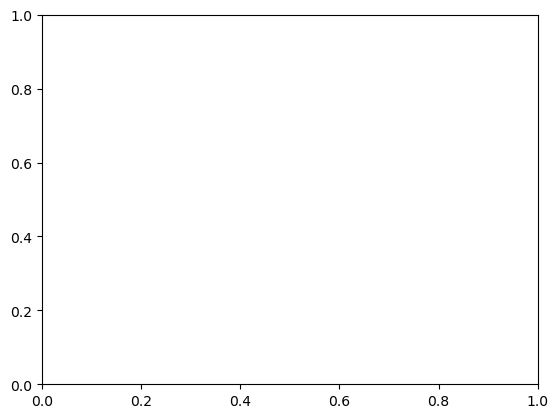

In [16]:

# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
from matplotlib import pyplot
# load data
dataset = loadtxt('data/diabetes.csv', delimiter=",") # split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot single tree
plot_tree(model)
pyplot.show()